In [47]:
# 📱 Indian Kids Screen Time Analysis (2023–2024)
# Dataset: Simulated screen usage of 9712 children aged 8–18 from urban and rural India

# 📦 Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')


In [48]:
# 📂 Step 2: Load Dataset
df = pd.read_csv("Indian_Kids_Screen_Time.csv")  # Replace with the correct file path if needed
df.head()


,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [49]:
# 🧹 Step 3: Data Cleaning
df.replace("?", np.nan, inplace=True)  # Replace placeholders
df.isnull().sum()  # Check for missing values


Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

In [50]:
numeric_columns = ['Total_Screen_Time', 'Educational_Use', 'Recreational_Use']
print(df.columns.tolist())
numeric_columns = ['Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
numeric_columns = ['Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()


['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device', 'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio', 'Health_Impacts', 'Urban_or_Rural']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6494 entries, 0 to 6493
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                6494 non-null   int64  
 1   Gender                             6494 non-null   object 
 2   Avg_Daily_Screen_Time_hr           6494 non-null   float64
 3   Primary_Device                     6494 non-null   object 
 4   Exceeded_Recommended_Limit         6494 non-null   bool   
 5   Educational_to_Recreational_Ratio  6494 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     6494 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 361.6+ KB


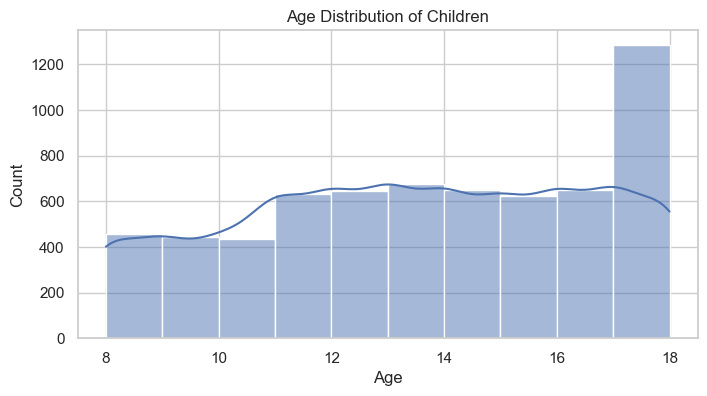

In [51]:
# 📊 Step 4: Exploratory Data Analysis (EDA)

# 4.1 Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Children')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


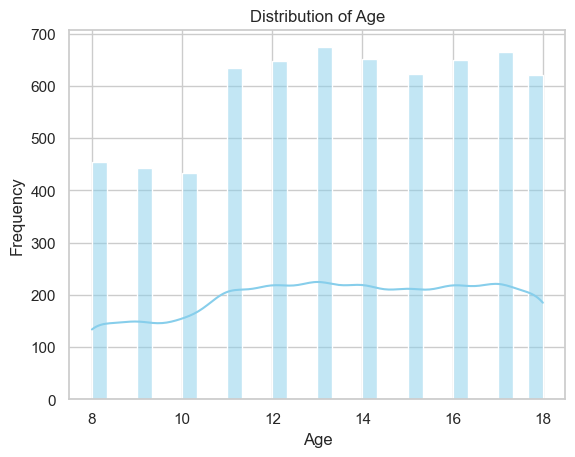

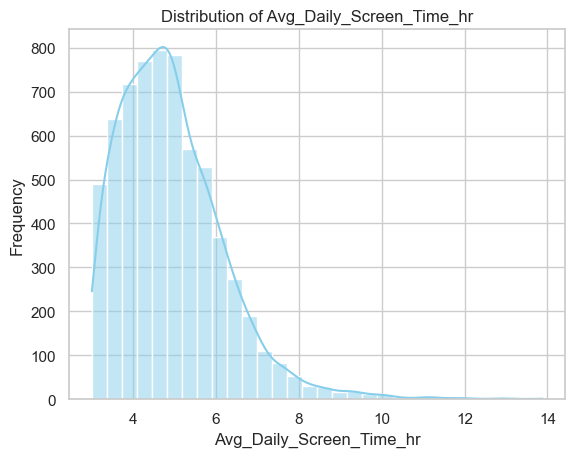

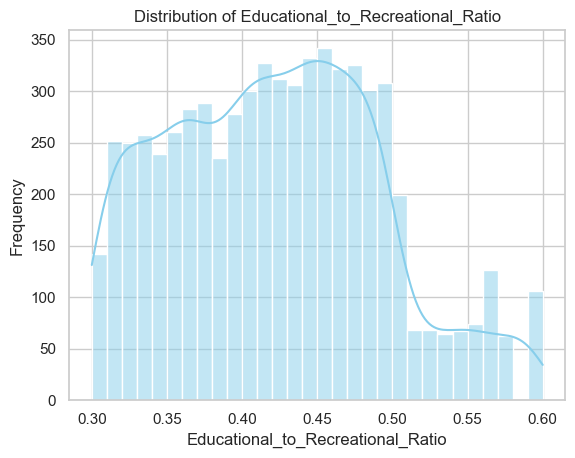

In [52]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2490509031.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', ci=None)


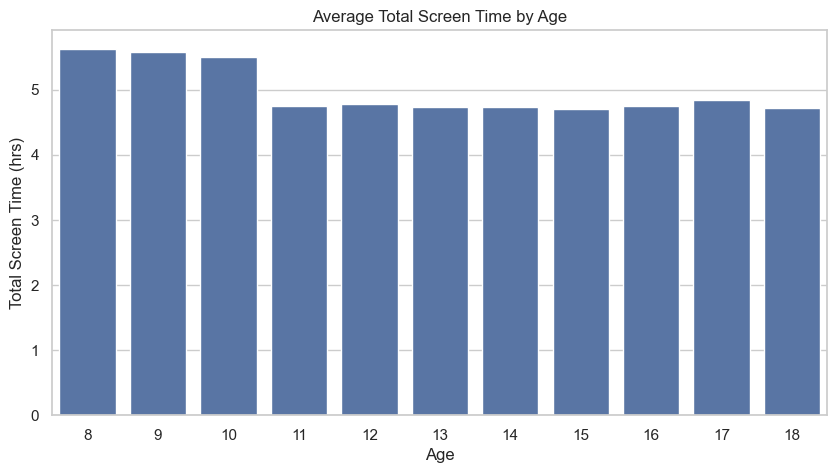

In [53]:
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', ci=None)
plt.title('Average Total Screen Time by Age')
plt.ylabel('Total Screen Time (hrs)')
plt.show()


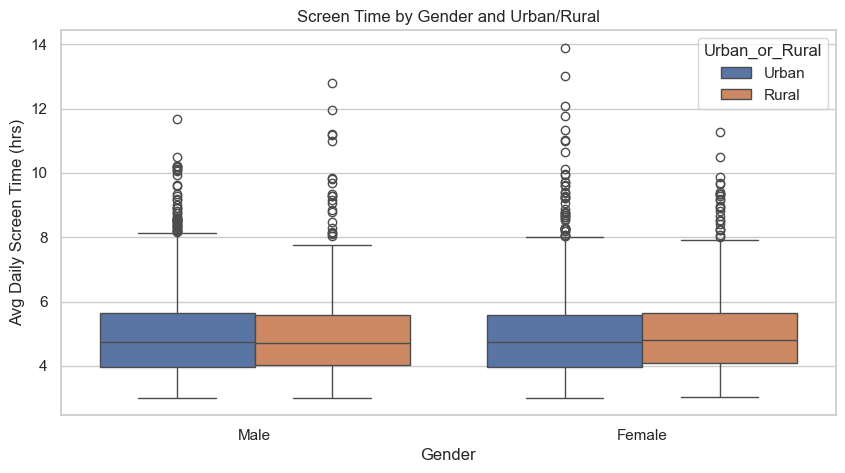

In [54]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Gender', y='Avg_Daily_Screen_Time_hr', hue='Urban_or_Rural')
plt.title('Screen Time by Gender and Urban/Rural')
plt.ylabel('Avg Daily Screen Time (hrs)')
plt.show()


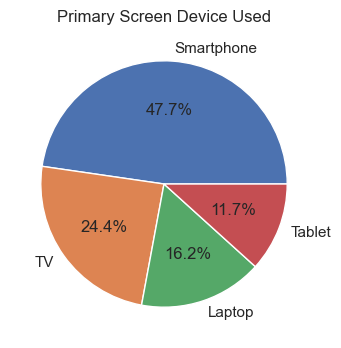

In [55]:
# 4.4 Primary Device Distribution
plt.figure(figsize=(8, 4))
df['Primary_Device'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Primary Screen Device Used')
plt.ylabel('')
plt.show()


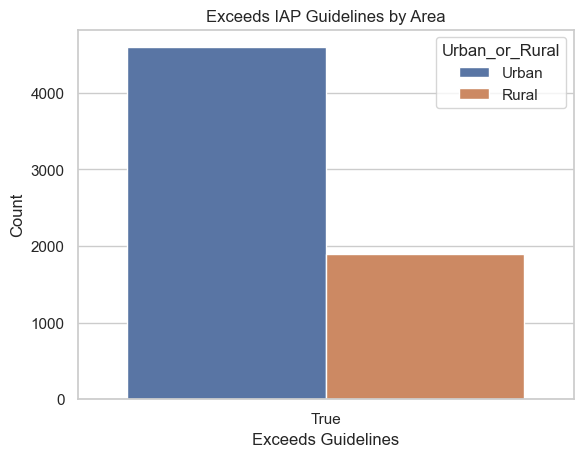

In [56]:
# 4.5 IAP Guidelines Compliance by Area
sns.countplot(data=df, x='Exceeded_Recommended_Limit', hue='Urban_or_Rural')
plt.title('Exceeds IAP Guidelines by Area')
plt.xlabel('Exceeds Guidelines')
plt.ylabel('Count')
plt.show()



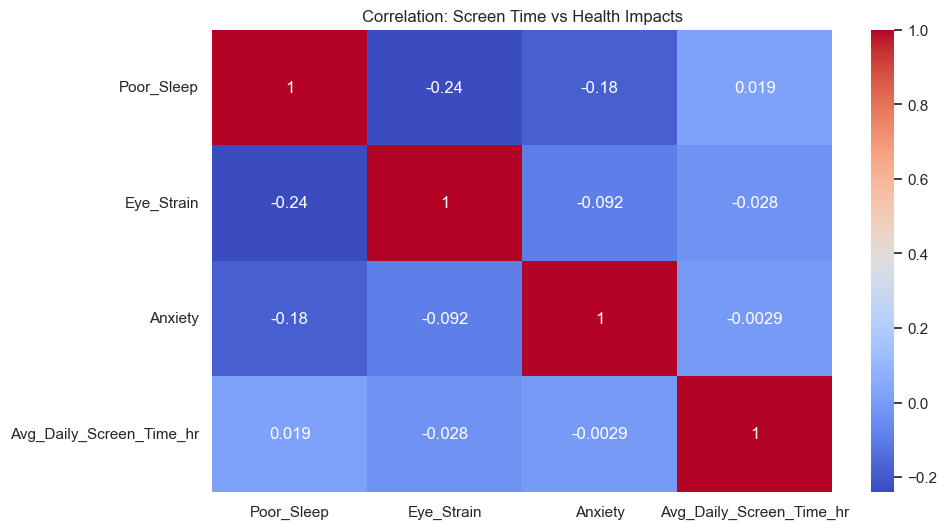

In [57]:
# 4.6 Correlation between Screen Time and Health Issues
health_issues = ['Poor Sleep', 'Eye Strain', 'Anxiety']
for issue in health_issues:
    df[issue.replace(' ', '_')] = df['Health_Impacts'].str.contains(issue, na=False).astype(int)

health_cols = ['Poor_Sleep', 'Eye_Strain', 'Anxiety']
plt.figure(figsize=(10, 6))
sns.heatmap(df[health_cols + ['Avg_Daily_Screen_Time_hr']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation: Screen Time vs Health Impacts')
plt.show()


In [58]:
# Define your column groups
cat_cols = ['Gender', 'Urban_or_Rural', 'Primary_Device', 'Exceeded_Recommended_Limit']
num_cols = ['Avg_Daily_Screen_Time_hr', 'Educational_to_Recreational_Ratio']


In [59]:
df_cleaned = df.dropna(subset=num_cols)


C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2897417358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')


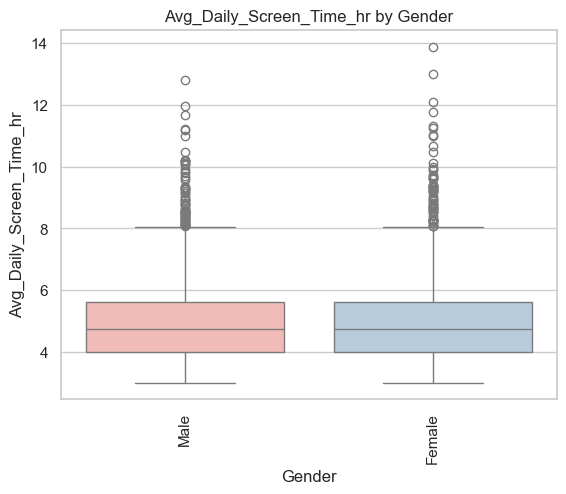

C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2897417358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')


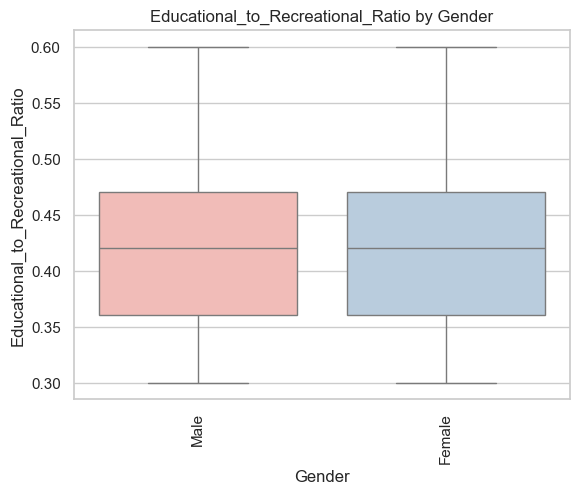

C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2897417358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')


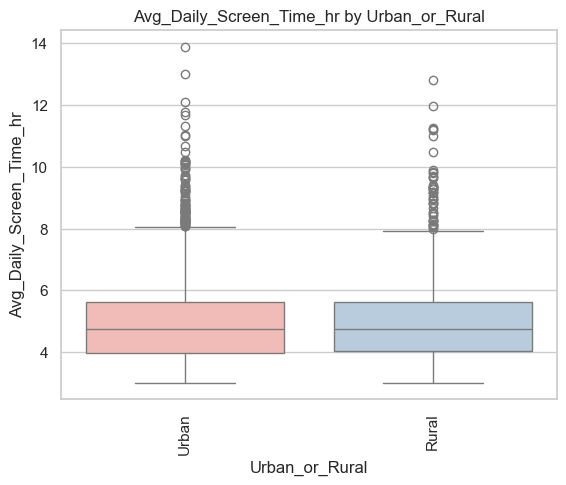

C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2897417358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')


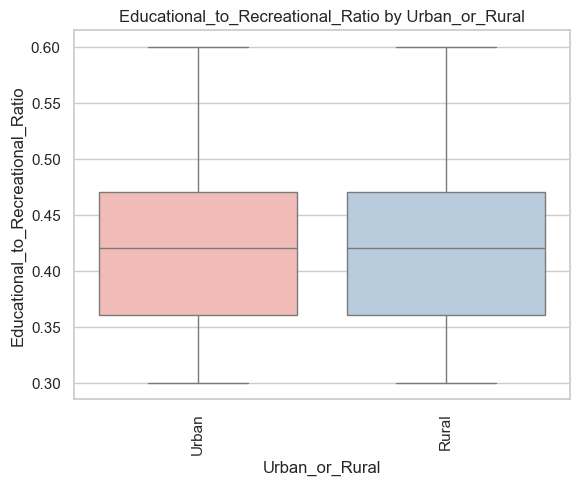

C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2897417358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')


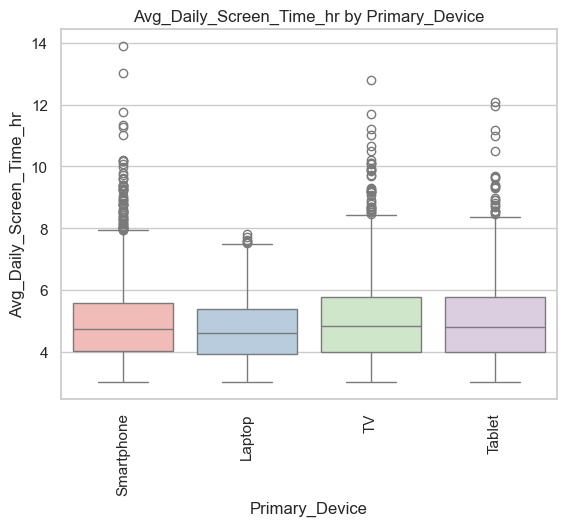

C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2897417358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')


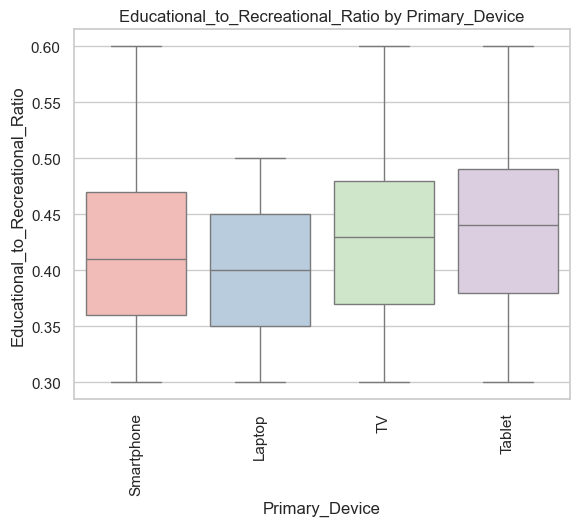

C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2897417358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')


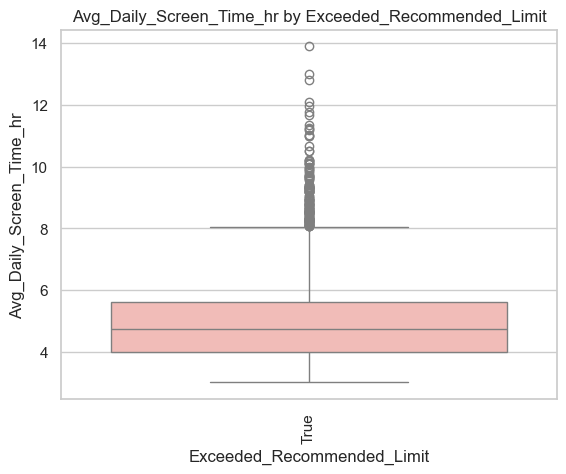

C:\Users\Yashbardhan\AppData\Local\Temp\ipykernel_23820\2897417358.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')


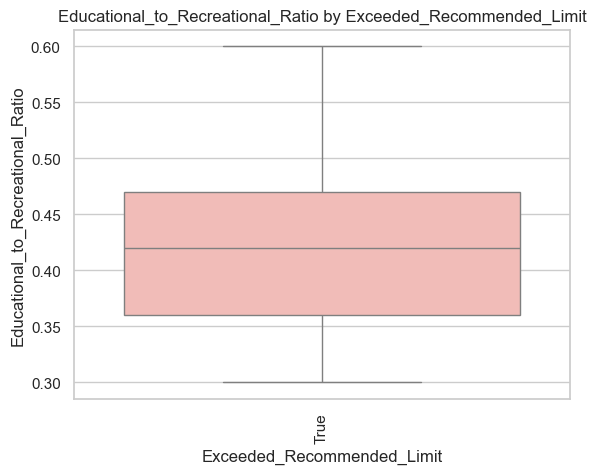

In [60]:
df_cleaned = df.dropna(subset=num_cols)
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
for cat in cat_cols:
    for num in num_cols:
        try:
            plt.figure()
            sns.boxplot(x=cat, y=num, data=df, palette='Pastel1')
            plt.title(f'{num} by {cat}')
            plt.xticks(rotation=90)
            plt.show()
        except Exception as e:
            print(f"Error plotting {num} by {cat}: {e}")


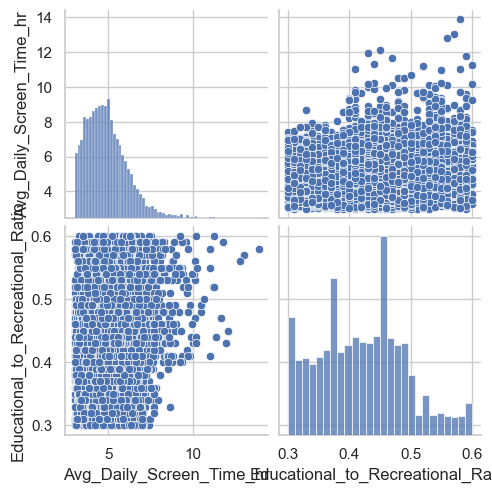

In [61]:
if len(num_cols) <= 5:
    sns.pairplot(df[num_cols])
    plt.show()
